In [345]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [347]:
digits = datasets.load_digits()

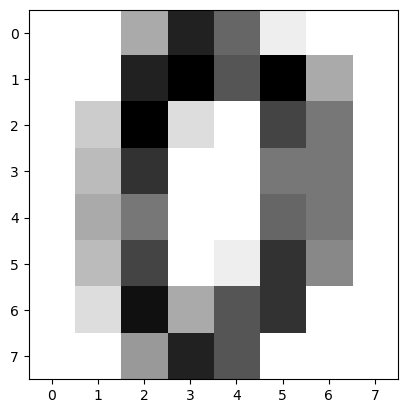

In [349]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [350]:
n_samples = len(digits.images)

In [353]:
X = digits.images.reshape((n_samples, -1))

In [355]:
X.shape

(1797, 64)

In [357]:
y = digits.target

In [359]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)

In [361]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

In [363]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [365]:
#Defining the model 
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(64,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

C:\Users\tisxo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 10)                  │              70 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,804 (18.77 KB)

 Trainable params: 4,804 (18.77 KB)

 Non-trainable params: 0 (0.00 B)

In [366]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split= 0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0846 - loss: 2.6083 - val_accuracy: 0.1458 - val_loss: 2.0133
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2768 - loss: 1.8612 - val_accuracy: 0.3958 - val_loss: 1.7119
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4784 - loss: 1.5263 - val_accuracy: 0.5556 - val_loss: 1.3000
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5789 - loss: 1.2056 - val_accuracy: 0.5833 - val_loss: 1.0521
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6698 - loss: 0.9702 - val_accuracy: 0.6389 - val_loss: 0.8577
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6861 - loss: 0.7935 - val_accuracy: 0.7083 - val_loss: 0.7107
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7689 - loss: 0.6072 - val_accuracy: 0.7708 - val_loss: 0.6197
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8118 - loss: 0.5381 - val_accuracy: 0.8403 - val_

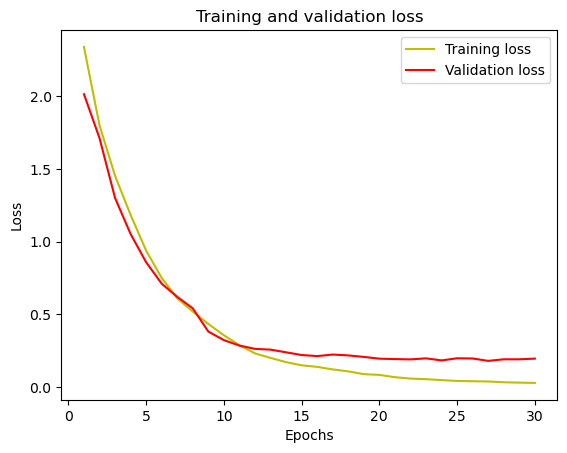

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

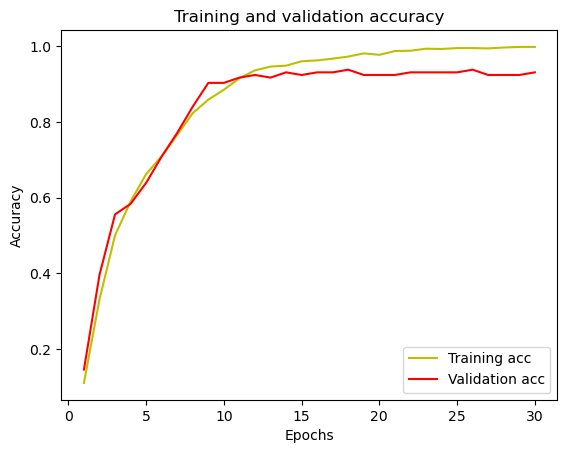

In [369]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [370]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.97      0.94      0.95        33
           2       0.97      0.94      0.95        32
           3       0.93      0.90      0.92        31
           4       0.93      0.95      0.94        40
           5       0.86      0.91      0.89        35
           6       1.00      1.00      1.00        39
           7       0.95      0.92      0.94        39
           8       0.85      0.91      0.88        32
           9       0.90      0.90      0.90        39

    accuracy                           0.94       360
   macro avg       0.94      0.93      0.94       360
weighted avg       0.94      0.94      0.94       360

[[39  0  0  0  1  0  0  0  0  0]
 [ 0 31  1  0  0  0  0  0  0  1]
 [ 0  0 30  2  0  0  0  0  0  0]
 [ 0  0  0 28  0  1  0  0  1  1]
 [ 0  0  0  0 38  1  0  1  0  0]
 [ 0  0  0  0  2 32  0  0  1  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0